In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')


In [56]:
df= pd.read_csv('insurance.csv')

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
df.shape

(1338, 7)

In [59]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [62]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


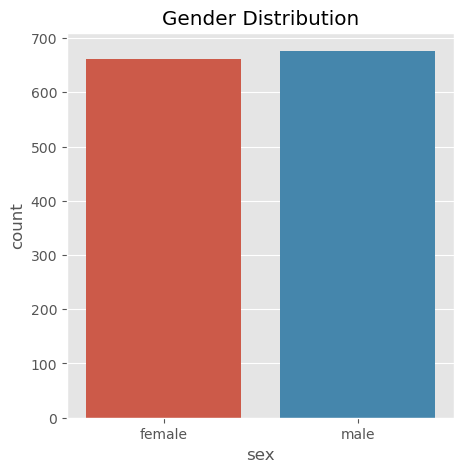

In [63]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

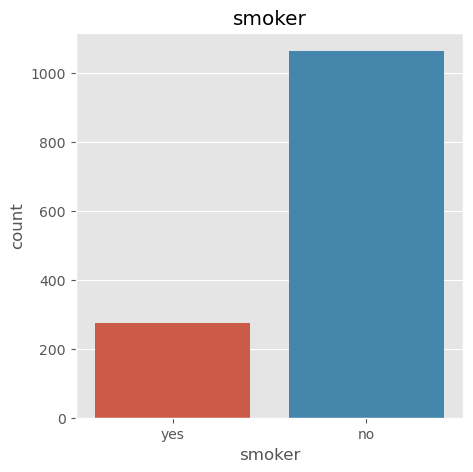

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('smoker')
plt.show()

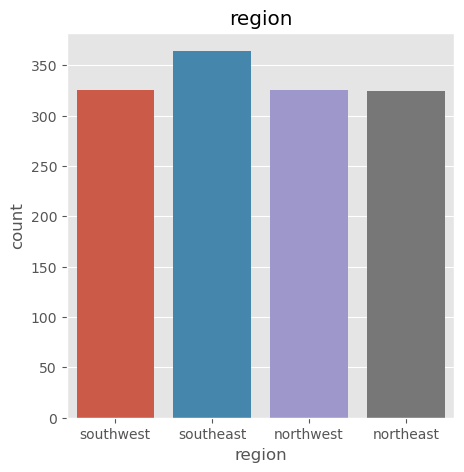

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

Text(0.5, 1.0, 'Cost vd Region')

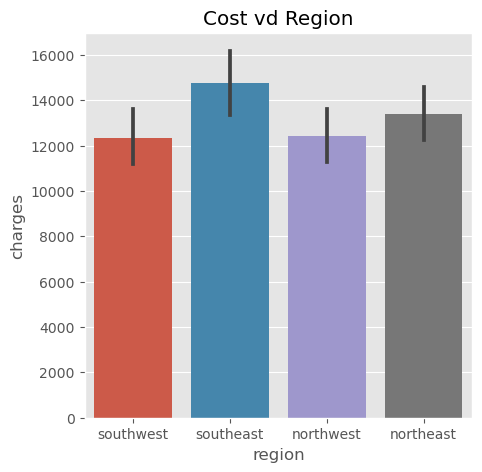

In [66]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y = 'charges',data=df)
plt.title('Cost vd Region')

Text(0.5, 1.0, 'Charges for smokers')

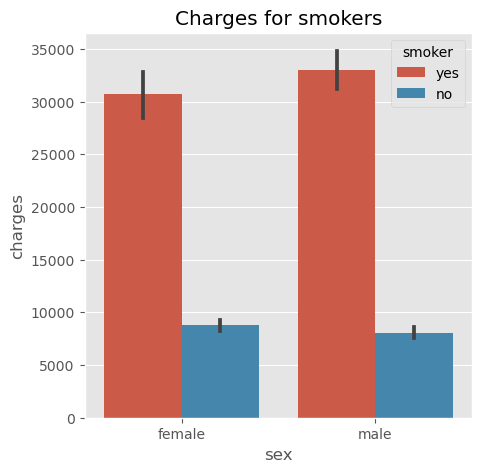

In [67]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data= df)
plt.title('Charges for smokers')

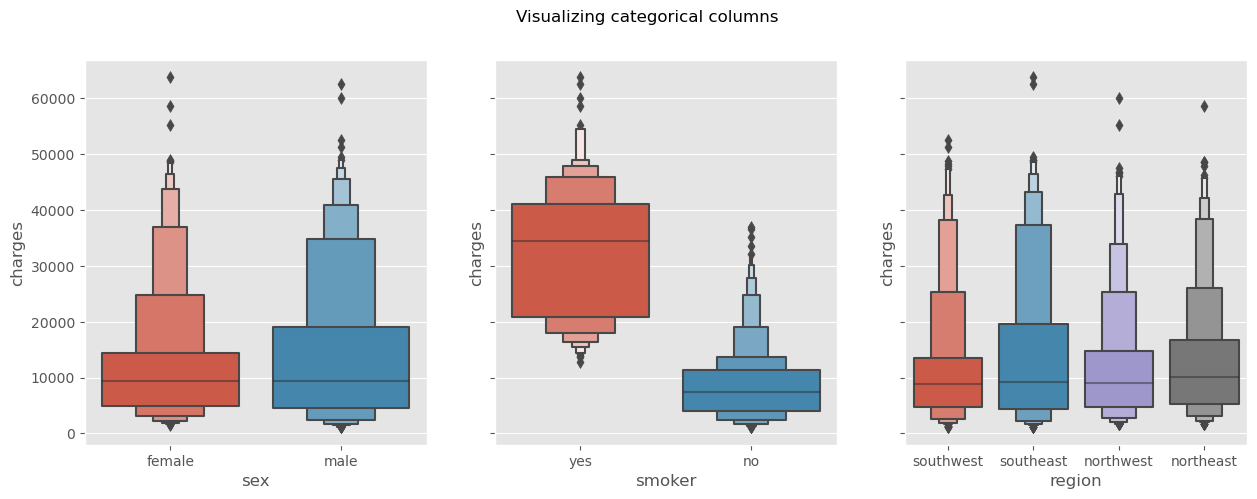

In [68]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='sex',y='charges',data=df, ax=axes[0])
sns.boxenplot(x='smoker',y='charges',data=df, ax=axes[1])
sns.boxenplot(x='region',y='charges',data=df, ax=axes[2])
plt.show()


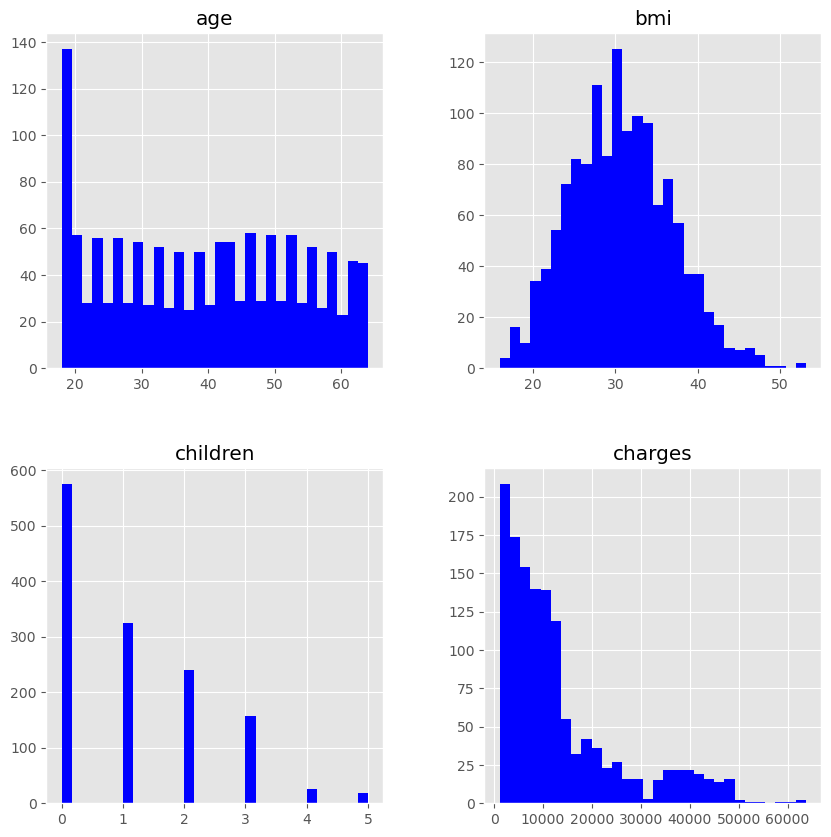

In [69]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

df.head()

In [70]:
df['sex']= df['sex'].apply({'male':0, 'female':1}.get)
df['smoker']= df['smoker'].apply({'yes':1, 'no':0}.get)
df['region']= df['region'].apply({'southwest':0, 'southeast': 2, 'northwest':3, 'northeast':4}.get)

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


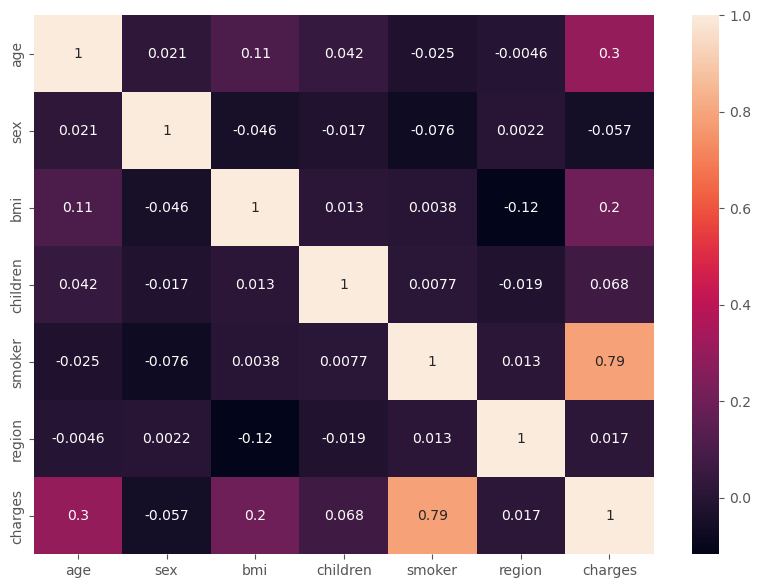

In [72]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [73]:
X = df.drop(['charges','sex'],axis= 1)
y = df.charges

In [74]:
X_train , X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (936, 5)
X_test shape: (402, 5)
y_train shape: (936,)
y_test shape: (402,)


## Linear Regression Model

In [75]:
linreg = LinearRegression()


In [76]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [77]:
from sklearn.metrics import r2_score

In [78]:
print("R2 score:", (r2_score(y_test, pred)))

R2 score: 0.7695163793697379


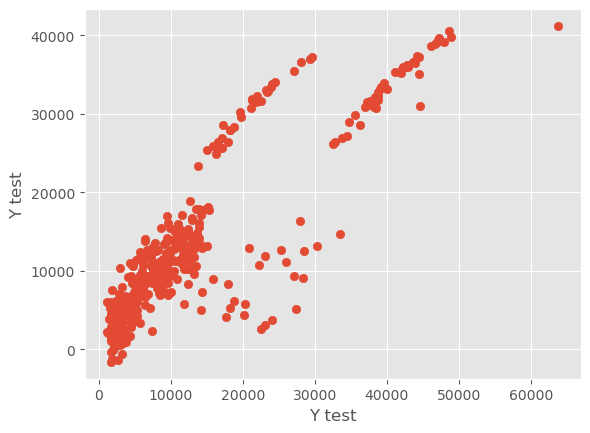

In [79]:
plt.scatter (y_test,pred)
plt.xlabel('Y test')
plt.ylabel('Y test')
plt.show()

In [80]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region' :2}
index= [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [81]:
cost_pred = linreg.predict(cust_df)
print("This medical insurance cost of the new customer is:", cost_pred)

This medical insurance cost of the new customer is: [33331.5273527]


<Axes: xlabel='who', ylabel='fare'>

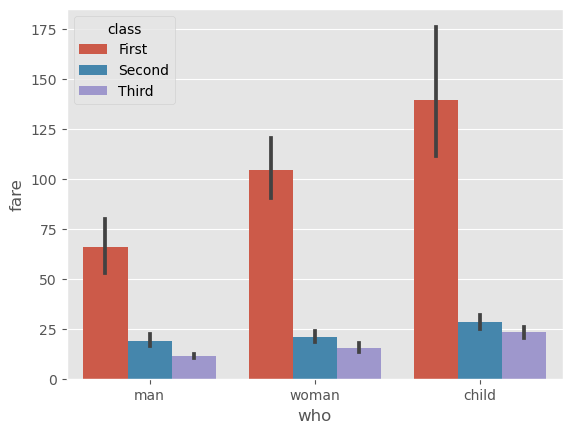

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a titanic.csv file
# from seaborn library
df = sns.load_dataset('titanic')
 
 
# who v/s fare barplot 
sns.barplot(x = 'who',
            y = 'fare',
            hue = 'class',
            data = df)
 
